In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Overpass'

import seaborn as sns
import bootstrap_contrast as bsc
%matplotlib inline

In [2]:
iris = sns.load_dataset("iris")

iris_melt = pd.melt(iris, id_vars='species', value_vars=iris.columns[:-1], var_name='measurement')
iris_melt_sepal_length = iris_melt[iris_melt.measurement == 'sepal_length'].copy()
iris_melt_sepal_length.drop('measurement', axis=1, inplace=True)

Text(0.5,0,'species')

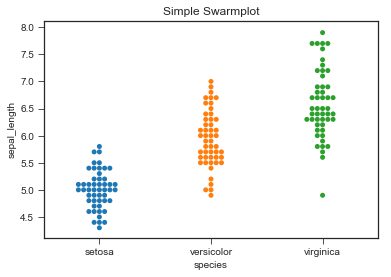

In [6]:
sns.set_style('ticks')

ax = sns.swarmplot(data=iris, x='species', y='sepal_length')

ax.set_title('Simple Swarmplot',
#              fontweight='bold', 
#              fontname='Arial', 
#              fontsize=15
            )

ax.set_xlabel('species', 
#               fontname='Arial', 
#               fontsize=15
             )

In [16]:
index_fragment = [i for i in range(0,50)]
index_all = np.concatenate([index_fragment, index_fragment, index_fragment])
iris_melt_sepal_length['index'] = index_all

In [18]:
iris_sepal_length = iris_melt_sepal_length.pivot('index','species','value')
iris_sepal_length.to_csv('iris_sepal_length.csv')

In [22]:
iris_sepal_length.to_records(index=False)

rec.array([( 5.1,  7. ,  6.3), ( 4.9,  6.4,  5.8), ( 4.7,  6.9,  7.1),
           ( 4.6,  5.5,  6.3), ( 5. ,  6.5,  6.5), ( 5.4,  5.7,  7.6),
           ( 4.6,  6.3,  4.9), ( 5. ,  4.9,  7.3), ( 4.4,  6.6,  6.7),
           ( 4.9,  5.2,  7.2), ( 5.4,  5. ,  6.5), ( 4.8,  5.9,  6.4),
           ( 4.8,  6. ,  6.8), ( 4.3,  6.1,  5.7), ( 5.8,  5.6,  5.8),
           ( 5.7,  6.7,  6.4), ( 5.4,  5.6,  6.5), ( 5.1,  5.8,  7.7),
           ( 5.7,  6.2,  7.7), ( 5.1,  5.6,  6. ), ( 5.4,  5.9,  6.9),
           ( 5.1,  6.1,  5.6), ( 4.6,  6.3,  7.7), ( 5.1,  6.1,  6.3),
           ( 4.8,  6.4,  6.7), ( 5. ,  6.6,  7.2), ( 5. ,  6.8,  6.2),
           ( 5.2,  6.7,  6.1), ( 5.2,  6. ,  6.4), ( 4.7,  5.7,  7.2),
           ( 4.8,  5.5,  7.4), ( 5.4,  5.5,  7.9), ( 5.2,  5.8,  6.4),
           ( 5.5,  6. ,  6.3), ( 4.9,  5.4,  6.1), ( 5. ,  6. ,  7.7),
           ( 5.5,  6.7,  6.3), ( 4.9,  6.3,  6.4), ( 4.4,  5.6,  6. ),
           ( 5.1,  5.5,  6.9), ( 5. ,  5.5,  6.7), ( 4.5,  6.1,  6.9),
      

(<matplotlib.figure.Figure at 0x11b359f98>,
   reference_group experimental_group  stat_summary  bca_ci_low  bca_ci_high  \
 0          setosa         versicolor         0.930       0.760        1.100   
 1          setosa          virginica         1.582       1.374        1.774   
 
      ci  is_difference  is_paired  pvalue_2samp_ind_ttest  pvalue_mannWhitney  
 0  95.0           True      False            8.985235e-18        8.345827e-14  
 1  95.0           True      False            6.892546e-28        6.396699e-17  )

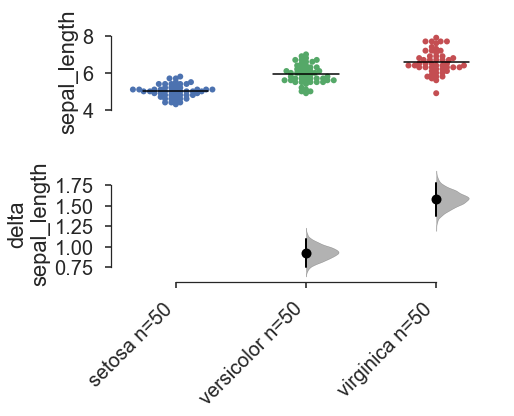

In [20]:
bsc.contrastplot(iris_sepal_length, idx=iris_sepal_length.columns, swarm_label='sepal_length')